### This Notebook Written By Bilge Kaan Gürgen

In [2]:
import torch
import torchvision
import torchvision.transforms as transforms

import os
import pandas as pd
from torch.utils.data import Dataset, DataLoader
from skimage import io

import warnings
warnings.filterwarnings("ignore")

In [3]:
class veri(Dataset):
    def __init__(self, csv_file, root_dir, transform=None):
        self.annotations = pd.read_csv(csv_file)
        self.root_dir = root_dir
        self.transform = transform

    def __len__(self):
        return len(self.annotations)

    def __getitem__(self, index):
        img_path = os.path.join(self.root_dir, self.annotations.iloc[index, 0])
        image = io.imread(img_path)
        y_label = torch.tensor(int(self.annotations.iloc[index, 1]))

        if self.transform:
            image = self.transform(image)

        return (image, y_label)

In [4]:
dataset = veri(
    csv_file=r"D:\udemyaicourse\Main\Pytorch Preprocess, Train, Prediction\formula_data_and_label\label\labelf1.csv",
    root_dir=r"D:\udemyaicourse\Main\Pytorch Preprocess, Train, Prediction\formula_data_and_label\images",
    transform=torchvision.transforms.Compose([
    transforms.ToTensor(),
    transforms.Resize(size=(28,28)),
    transforms.Normalize((0.5,0.5,0.5), (0.5,0.5,0.5)),
    ]))

In [5]:
dataset

In [6]:
train_set, test_set = torch.utils.data.random_split(dataset, [200, 79])
train_loader = DataLoader(dataset=train_set, batch_size=1, shuffle=True)
test_loader = DataLoader(dataset=test_set, batch_size=1, shuffle=True)

In [7]:
train_set

In [8]:
train_loader

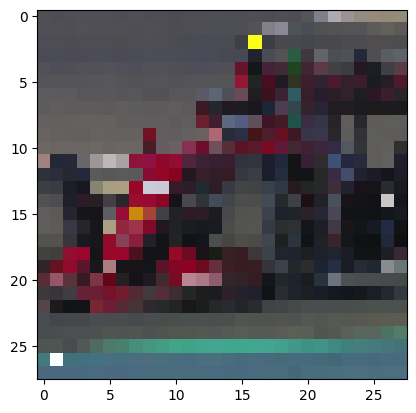

Ferrari
torch.Size([1, 3, 28, 28])


In [9]:
import matplotlib.pyplot as plt
import numpy as np
batch_size = 1
classes = ["Ferrari", "McLaren","Mercedes","Redbull"]

def imshow(img):
    img = img / 2 + 0.5     # unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()

dataiter = iter(train_loader)
images, labels = next(dataiter)

imshow(torchvision.utils.make_grid(images))
print(' '.join('%5s' % classes[labels[j]] for j in range(batch_size)))
print(images.size())

In [10]:
import torch.nn as nn

In [11]:
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.conv1 = nn.Conv2d(3, 4, (5,5))
        self.conv2 = nn.Conv2d(4, 8, (3,3))
        self.conv3 = nn.Conv2d(8, 16, (2,2))
        self.conv4 = nn.Conv2d(16, 32, (2,2))


        self.max = nn.MaxPool2d(kernel_size=(2, 2))
        
        self.func = nn.ELU()
        self.func1 = nn.ReLU()

        self.fc1 = nn.Linear(64, 50) # tensorflow da dense diye geçiyor torch da lineer
        self.fc2 = nn.Linear(50, 50)
        self.fc3 = nn.Linear(50, 100)
        self.fc4 = nn.Linear(100, 4)
        

    def forward(self, x):
        x = self.conv1(x)
        x = self.func(x)

        x = self.max(x)

        x = self.conv2(x)
        x = self.func(x)

        x = self.max(x)

        x = self.conv3(x)
        x = self.func(x)

        x = self.max(x)

        x =x.view(x.size(0), -1)

        x = self.fc1(x)
        x = self.func(x)
        x = self.fc2(x)
        x = self.func(x)
        x = self.fc3(x)
        x = self.func(x)
        x = self.fc4(x)
        x = self.func(x)

        return x

In [12]:
import time

In [13]:
start = time.time()

model = Net()

optimizer = torch.optim.Adamax(model.parameters(), lr=0.001)

error = torch.nn.CrossEntropyLoss()

from torch.optim.lr_scheduler import StepLR
lr= StepLR(optimizer, step_size=2, gamma=0.7)

epoch = 10

kayip = []
count = 0
iterasyon = []

for i in range(epoch):
    lr.step()
    print ("Epoch:", epoch, "LR:", lr.get_lr())

    for i, (images, label) in enumerate(train_loader): # image ve label ı alıyoruz
        

        optimizer.zero_grad() # gradyanları sıfırlıyoruz çünkü her epochta gradyanlar toplanıyor bu yüzden baştan sıfırlıyoruz
        tahmin = model(images) 
        loss = error(tahmin, label)  # loss hesaplıyoruz
        loss.backward()  # geriyayılım yapıyoruz
        optimizer.step()  # gradyanları güncelliyoruz bir sonraki adıma geç diyoruz.
        
        print ("Epoch [{}/ {}], Loss {:.4f}".format(epoch+1, epoch, loss.item()))

end = time.time()
print("Süre: ", end - start)


Epoch: 10 LR: [0.001]
Epoch [11/ 10], Loss 1.3846
Epoch [11/ 10], Loss 1.3475
Epoch [11/ 10], Loss 1.4507
Epoch [11/ 10], Loss 1.4697
Epoch [11/ 10], Loss 1.4503
Epoch [11/ 10], Loss 1.4269
Epoch [11/ 10], Loss 1.3271
Epoch [11/ 10], Loss 1.4155
Epoch [11/ 10], Loss 1.3507
Epoch [11/ 10], Loss 1.4784
Epoch [11/ 10], Loss 1.4733
Epoch [11/ 10], Loss 1.3773
Epoch [11/ 10], Loss 1.3610
Epoch [11/ 10], Loss 1.4696
Epoch [11/ 10], Loss 1.3632
Epoch [11/ 10], Loss 1.3591
Epoch [11/ 10], Loss 1.4569
Epoch [11/ 10], Loss 1.3673
Epoch [11/ 10], Loss 1.3483
Epoch [11/ 10], Loss 1.3534
Epoch [11/ 10], Loss 1.3447
Epoch [11/ 10], Loss 1.4473
Epoch [11/ 10], Loss 1.4476
Epoch [11/ 10], Loss 1.3308
Epoch [11/ 10], Loss 1.4267
Epoch [11/ 10], Loss 1.3209
Epoch [11/ 10], Loss 1.3121
Epoch [11/ 10], Loss 1.3055
Epoch [11/ 10], Loss 1.4104
Epoch [11/ 10], Loss 1.4844
Epoch [11/ 10], Loss 1.4020
Epoch [11/ 10], Loss 1.4957
Epoch [11/ 10], Loss 1.2720
Epoch [11/ 10], Loss 1.3964
Epoch [11/ 10], Loss 1.396

In [15]:
def dogruluk(loader, model):
    num_correct = 0
    num_samples = 0
    model.eval() # modeli test moduna alıyoruz

    with torch.no_grad(): # gradyanları hesaplamıyoruz
        for x, y in loader:
            tahmin = model(x)
            _, pred = tahmin.max(1)
            num_correct += (pred == y).sum()
            num_samples += pred.size(0)

        print(f"Got {num_correct} / {num_samples} with accuracy {float(num_correct)/float(num_samples)*100:.2f}")

    model.train() # modeli tekrar eğitim moduna alıyoruz
    

In [16]:
print("Train seti için doğruluk: ")
dogruluk(train_loader, model)
print("Test seti için doğruluk: ")
dogruluk(test_loader, model)

Train seti için doğruluk: 
Got 138 / 200 with accuracy 69.00
Test seti için doğruluk: 
Got 52 / 79 with accuracy 65.82
